In [ ]:
#library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
# loading data
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

7


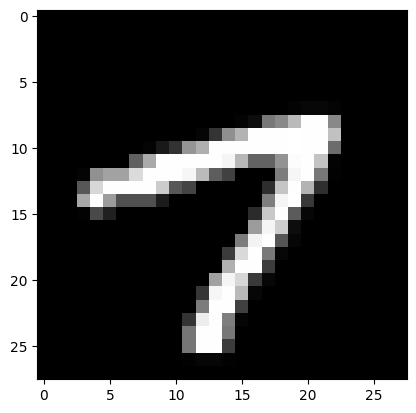

In [ ]:
index = 101
label = y_train[index]
image = x_train[index]
plt.imshow(image, cmap="gray")
print (label)

# preprocessing


In [ ]:
# Normalizing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train[100].shape

(28, 28)

# Model definition


In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # تبدیل تصویر به بردار یک‌بعدی

    keras.layers.Dense(512, activation='relu'),  # لایه اول با 512 نورون و فعال‌سازی ReLU
    keras.layers.Dropout(0.2),  # Dropout با نرخ 20% برای جلوگیری از Overfitting

    keras.layers.Dense(256, activation='relu'),  # لایه دوم با 256 نورون
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, activation='relu'),  # لایه سوم با 128 نورون
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation='softmax')  # لایه خروجی با 10 کلاس و فعال‌سازی Softmax
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiler
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#early stop
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=3,
                                               restore_best_weights=True)


In [ ]:
#training
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.8260 - loss: 0.5557 - val_accuracy: 0.9665 - val_loss: 0.1086
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.9624 - loss: 0.1223 - val_accuracy: 0.9743 - val_loss: 0.0809
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9726 - loss: 0.0887 - val_accuracy: 0.9776 - val_loss: 0.0687
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9785 - loss: 0.0677 - val_accuracy: 0.9783 - val_loss: 0.0751
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9818 - loss: 0.0557 - val_accuracy: 0.9805 - val_loss: 0.0720
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9845 - loss: 0.0485 - val_accuracy: 0.9829 - val_loss: 0.0594
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9865 - loss: 0.0459 - val_accuracy: 0.9776 - val_loss: 0.0762
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9884 - loss: 0.0357 - 

In [ ]:
# Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"    Accuracy in trained data : {test_accuracy * 100:.2f}%")

313/313 - 1s - 4ms/step - accuracy: 0.9829 - loss: 0.0594
    Accuracy in trained data : 98.29%


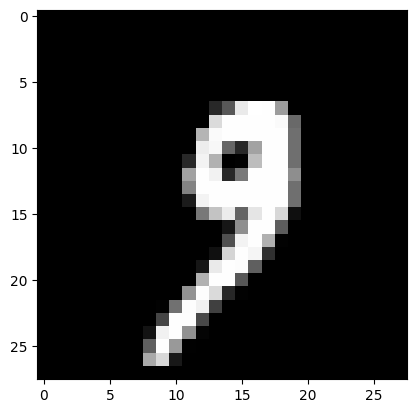

In [ ]:
img = x_test[1000]
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# prediction always need (-.-.-) this type of shape, because it considers the first number as a batch size . if we give it (-.-) in thos type,
# then it assumed the first nubmer as a batch and will not pay attention to shape. so we need to add one dimention as a batch size.
prediction = model.predict(img.reshape(1, 28, 28))
print("Predicted Class:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted Class: 9


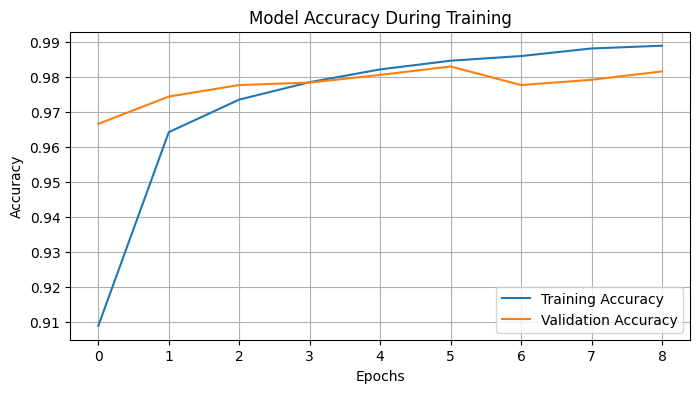

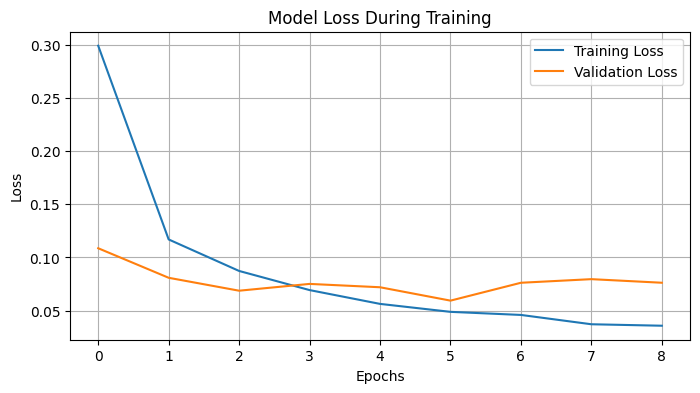

In [ ]:
import matplotlib.pyplot as plt

# Extracting history data from the model
history_data = history.history

# Plotting Accuracy Graph
plt.figure(figsize=(8, 4))
plt.plot(history_data['accuracy'], label='Training Accuracy')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy During Training')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Loss Graph
plt.figure(figsize=(8, 4))
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss During Training')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.save('mnist.h5')


In [ ]:
from google.colab import files
files.download('mnist.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>